# Radius - density - mass relation for small planets around M Dwarfs

In [1]:
%matplotlib inline

In [2]:
from matplotlib.pyplot import subplots
from moot import RMRelation

## Initialise RadiusMassRelation

In [3]:
rmr = RMRelation()

In [4]:
from matplotlib.pyplot import *
from matplotlib import cm
from moot.rdmodel import RadiusDensityModel
from moot.model import model_means
from numpy import *

In [5]:
rdm = RadiusDensityModel()

In [6]:
r, mm = model_means(rmr.posterior_samples, rdm)

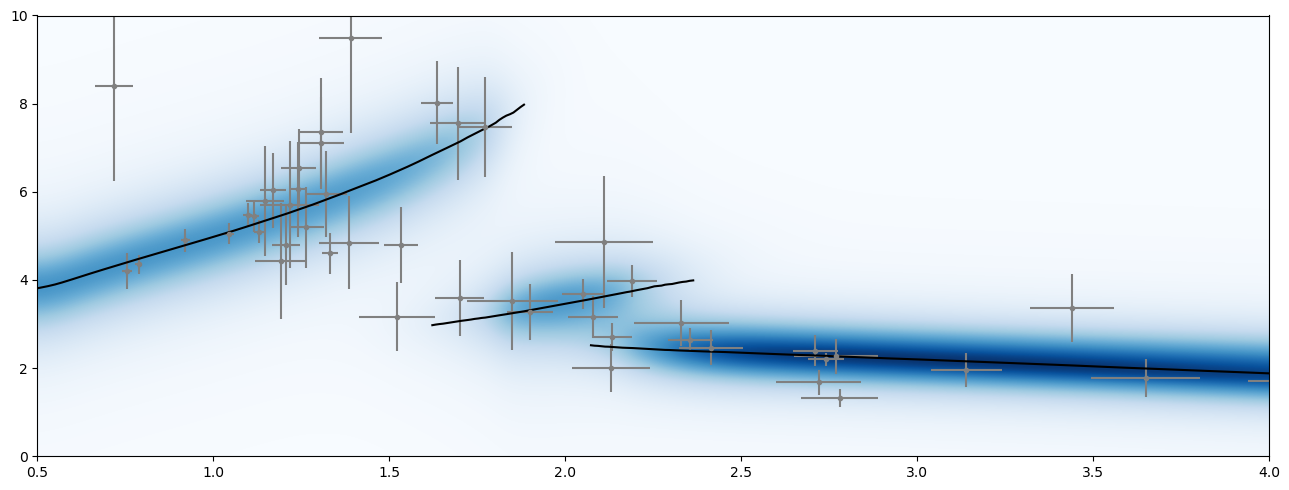

In [10]:
fig, ax = subplots(figsize=(13, 5))
ax.imshow(rmr.rd_posterior.T, origin='lower', aspect='auto', cmap=cm.Blues, interpolation='bicubic',
       extent=(rmr.radii[0], rmr.radii[-1], rmr.densities[0], rmr.densities[-1]), 
       vmax=rmr.rd_posterior.max())
ax.errorbar(rmr.catalog.radius, rmr.catalog.density, xerr=rmr.catalog.radius_e, yerr=rmr.catalog.density_e, 
         fmt= '.', c='0.5')
ax.plot(r, mm['rocky'][0], 'k')
ax.plot(r, mm['water'][0], 'k')
ax.plot(r, mm['puffy'][0], 'k')
setp(ax, xlim=(0.5, 4), ylim=(0, 10))
fig.tight_layout()

## Calculate the density and mass distributions

After the initialization, we can obtain a planet density or mass sample given the planet radius with its uncertainty using the `RadiusMassRelation.sample` method. The method returns a `Distribution` object that stores the samples and also includes methods for plotting the distribution etc.

Density distribution                     Mass distribution                       
size: 20000                              size: 20000                             
is bimodal: True                         is bimodal: True                        
                                                                                 
Distribution model:                      Distribution model:                     
  0.56 × T(m=3.17, σ=0.83, λ=4.62)         0.49 × T(m=3.51, σ=1.09, λ=7.00)      
+ 0.44 × T(m=7.15, σ=1.11, λ=5.50)       + 0.51 × T(m=6.60, σ=1.77, λ=7.00)      


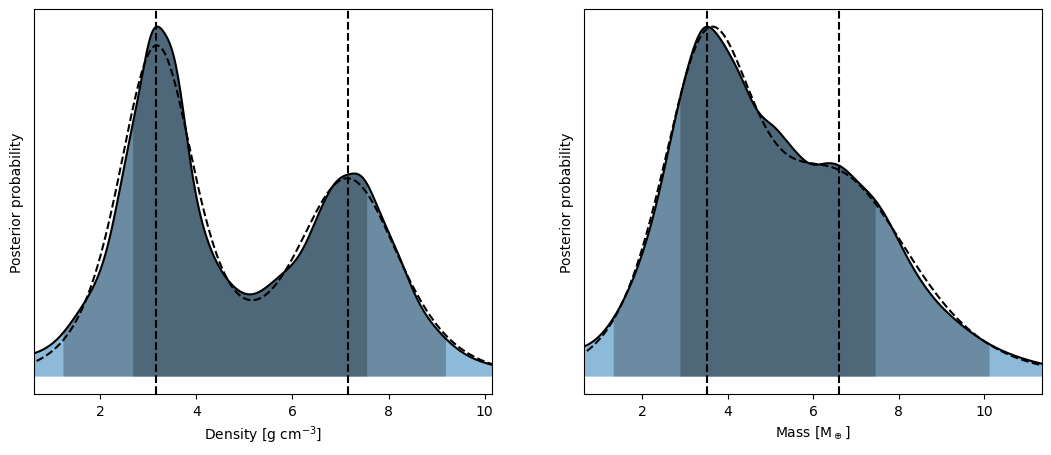

In [11]:
r, re = 1.8, 0.1
fig, axs = subplots(1, 2, figsize=(13,5))

density_distribution = rmr.sample('density', (r, re), 20_000)
density_distribution.plot(ax=axs[0])

mass_distribution = rmr.sample('mass', (r, re), 20_000)
mass_distribution.plot(ax=axs[1])

for ld, lm in zip(str(density_distribution).split('\n'), str(mass_distribution).split('\n')):
    print(f"{ld:40s} {lm:40s}")


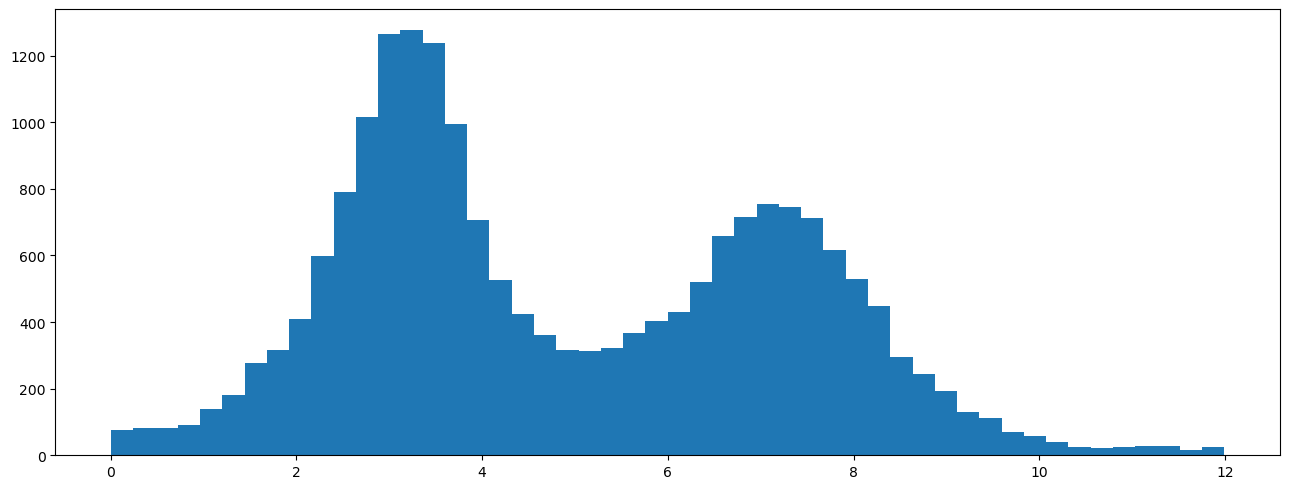

In [12]:
fig, ax = subplots(figsize=(13,5))
ax.hist(density_distribution.samples, bins=50)
fig.tight_layout()

---
<center>
   &copy; 2022 Hannu Parviainen
</center>